![](../doc/pics/GPK_BME_MOGI.png)
# Tail wag result plotting
In this notebook the deep dense neural network trained to recognise the tail wagging behaviour of the dog is applied to the measurement result. The model's prediction and the human annotator's behaviour classification can be compared on a plot.

Notebook written by András Zöllner, [zollner.andras@gmail.com](mailto:zollner.andras@gmail.com)

## Importing the needed tools
Firstly the tensorflow and data processing tools are imported

In [1]:
#imports
#tensorflow imports
import tensorflow as tf
from tensorflow import keras

from dataprocess import * #for EtoData class

import matplotlib.pyplot as plt #for plotting
import numpy as np

## Loading the measurement data and the neural network

In this case the network inputs are:
- owner: distance from dog, is in room ? 
- stranger: distance from dog, is in room ? 

In [2]:
#loading the data from files and consturcting the myData EtoData instance
mocapy_file = "../log/Husky_02-processed [MISLABELED EPISODES].csv" #path of the mocapy csv file
video_file = "../log/vid_tags_time_refined.csv" #path of the solomon coder csv file
myData = EtoData(mocapy_file,video_file) #construct the myData instace of the EtoData class

In [3]:
#loading the keras neural network
model_path = "../models/tail_model"
model = keras.models.load_model(model_path)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                6

In [4]:
#load the input data and the tags
x = myData.get_preproc_cols(col_names=["OWN_d", "STR_d", "OWN_is_in_room", "STR_is_in_room"])
y = myData.get_preproc_cols(col_names=["Tail"])
print(x.shape)
print(y.shape)

(47590, 4)
(47590, 1)


In [5]:
#predict y values with tensorflow
y_pred = np.argmax(model.predict(x), axis=-1)

In [6]:
#printing the shapes
print(x.shape)
print(y.shape)
print(y_pred.shape)

(47590, 4)
(47590, 1)
(47590,)


## Plotting the results

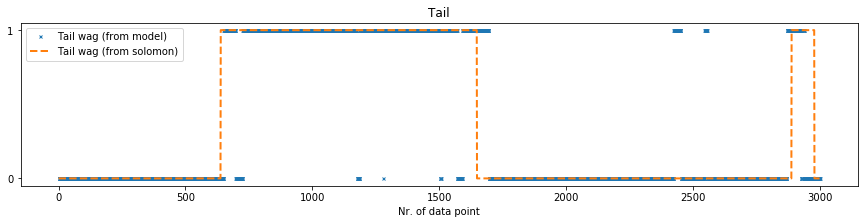

In [16]:
#plotting the results
s = 6000
e = 9000

plt.figure(figsize=[15,3])
plt.title("Tail")
plt.plot(y_pred[s:e], 'x', linewidth=2, markersize=3, label="Tail wag (from model)")
plt.plot(y[s:e], '--', linewidth=2, markersize=12, label="Tail wag (from solomon)")
plt.xlabel("Nr. of data point")
plt.yticks(np.arange(0, 1.1, 1))
plt.legend()
plt.savefig('tail.png',dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
print(myData.tail_dict)